In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import visualization as vis
import data_manage as dm
import lrlo as lrlo

In [3]:
LOG_ROOT = 'data/logs/'
CSV_ROOT = 'data/csvs/'

In [4]:
network_config = {
    "abilene" : {
        "node_num" : 11,
        "dest_node" : ["latency: node9", "latency: node10", "latency: node11"],
        "V": "1000000"
    },
    "abilene_dummy" : {
        "node_num" : 11,
        "dest_node" : ["latency: node9", "latency: node10", "latency: node11"],
        "V": "100000"
    },
    "abilene_dummy1" : {
        "node_num" : 11,
        "dest_node" : ["latency: node9", "latency: node10", "latency: node11"],
        "V": "500000"
    },
    "abilene_dummy2" : {
        "node_num" : 11,
        "dest_node" : ["latency: node9", "latency: node10", "latency: node11"],
        "V": "10000"
    },
    "abilene_dummy3" : {
        "node_num" : 11,
        "dest_node" : ["latency: node9", "latency: node10", "latency: node11"],
        "V": "5000"
    },
    "yolo" : {
        "node_num" : 4,
        "dest_node" : None,
        "V": "10000000"
    }
}

In [5]:
#network = "yolo"
# network = "abilene"
network = "abilene_dummy"
dataset = 'JK'
# dataset = 'SD'
# dataset = 'JN'

In [6]:
backlog_path_masking = CSV_ROOT + network + "_backlog_masking_" + network_config[network]['V'] + "_" + dataset + ".csv"
latency_path_masking = CSV_ROOT +  network + "_latency_masking_" + network_config[network]['V'] + "_" + dataset + ".csv"
backlog_path_unmasking = CSV_ROOT  +  network + "_backlog_unmasking" + "_" + dataset + ".csv"
latency_path_unmasking = CSV_ROOT  +  network + "_latency_unmasking" + "_" + dataset + ".csv"
log_dir_train = LOG_ROOT + "train/240318-184226_videopath_JK_rewardmethod_10_importantmethod_021_threshold_0.35"
log_dir_masking = LOG_ROOT + "test/240327-082030_JK-1_240318-184226_reward_10_thresh_0.35_mask_True_agent_3"
log_dir_unmasking = LOG_ROOT + "test/240327-063311_JK-1_240318-184226_reward_10_thresh_0.35_mask_False_agent_3"

barcode_1 = LOG_ROOT + "test/240327-081943_JK-1_240318-184226_reward_10_thresh_0.35_mask_True_agent_1"
barcode_2 = LOG_ROOT + "test/240327-082020_JK-1_240318-184226_reward_10_thresh_0.35_mask_True_agent_2"
barcode_3 = LOG_ROOT + "test/240327-082030_JK-1_240318-184226_reward_10_thresh_0.35_mask_True_agent_3"

In [7]:
color_list = ["tomato", "salmon", "darkorange", "gold", "forestgreen", "mediumseagreen", "cornflowblue", "royalblue", "steelblue", "slateblue"]

### 1. Plot log Data

In [8]:
SKIP = True

In [9]:

# Load Data
tag_list = ["Network/Diff", "Network/send_a(t)", "Network/target_A(t)"]

train = dm.load_log(log_dir_train)
masking = dm.load_log(log_dir_masking, tag_list)
unmasking = dm.load_log(log_dir_unmasking, tag_list)

b1 = dm.load_log(barcode_1, tag_list)
b2 = dm.load_log(barcode_2, tag_list)
b3 = dm.load_log(barcode_3, tag_list)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [10]:
if not SKIP:
    lrlo.plot_reward(train)
    lrlo.plot_comparison_reward([train, train], ['10', '11'])
    
    lrlo.plot_frame_barcode(b1, color="salmon")
    lrlo.plot_frame_barcode(b2, color="mediumseagreen")
    lrlo.plot_frame_barcode(b3, color="royalblue")
    
    lrlo.plot_frame_barcode(unmasking, color="slateblue")

In [11]:
if not SKIP:
    lrlo.plot_send(masking)
    lrlo.plot_fraction(masking)
    lrlo.plot_send_and_guide(masking)
    lrlo.plot_send_and_guide_as_fraction(masking)
    lrlo.plot_comparison_send([masking, unmasking], ["masking", "unmasking"])
    lrlo.plot_comparison_fraction([masking, unmasking], ["masking", "unmasking"])
    lrlo.plot_diff(masking)
    lrlo.plot_comparison_diff([masking, unmasking], ["masking", "unmasking"])

### 2. Plot OMNeT++ Data

In [12]:
# Load Data
latency_masking = dm.load_csv(latency_path_masking)
latency_masking_df = lrlo.parse_omnet_csv(latency_masking, 'latency', node_list=network_config[network]["dest_node"])
latency_unmasking = dm.load_csv(latency_path_unmasking)
latency_unmasking_df = lrlo.parse_omnet_csv(latency_unmasking, 'latency', node_list=network_config[network]["dest_node"])

backlog_masking = dm.load_csv(backlog_path_masking)
backlog_masking_df = lrlo.parse_omnet_csv(backlog_masking, 'backlog')
backlog_unmasking = dm.load_csv(backlog_path_unmasking)
backlog_unmasking_df = lrlo.parse_omnet_csv(backlog_unmasking, 'backlog')

sum_masking_df = lrlo.get_backlog_sum(backlog_masking_df)
sum_unmasking_df = lrlo.get_backlog_sum(backlog_unmasking_df)

d:\VSC\INFOCOM\Visualization-is-All-you-Need\lrlo.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['name'] = extracted_df['name'].str[3:]
d:\VSC\INFOCOM\Visualization-is-All-you-Need\lrlo.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_df['name'] = extracted_df['name'].str[3:]


In [13]:
dm.df_info(latency_masking_df)
dm.df_info(latency_unmasking_df)

if network == 'yolo':
    masking_mean_value = latency_masking_df['node4'].mean()
    print("masking mean value: ", masking_mean_value)
    unmasking_mean_value = latency_unmasking_df['node4'].mean()
    print("unmasking mean value: ", unmasking_mean_value)
    
elif network in ['abilene', 'abilene_dummy', 'abilene_dummy1', 'abilene_dummy2', 'abilene_dummy3']:
    for node in network_config[network]['dest_node']:
        masking_mean_value = latency_masking_df[node].mean()
        print("masking mean value: ", masking_mean_value, "(", node, ")")
        unmasking_mean_value = latency_unmasking_df[node].mean()
        print("unmasking mean value: ", unmasking_mean_value, "(", node, ")")

DataFrame Info:
✲ Shape: (9575, 3)
✲ Columns:
Index(['latency: node9', 'latency: node10', 'latency: node11'], dtype='object', name='name')

✲ Data Types:
name
latency: node9     float64
latency: node10    float64
latency: node11    float64
dtype: object

✲Non-null Value Counts:
name
latency: node9     2087
latency: node10    3806
latency: node11    3682
dtype: int64

DataFrame HEAD:
--------------------------------------------------


name      latency: node9  latency: node10  latency: node11
vectime                                                   
0.191325        0.091325              NaN              NaN
0.283566             NaN         0.083566              NaN
0.356472        0.223139              NaN              NaN
0.357024             NaN              NaN         0.157024
0.405390        0.105374              NaN              NaN

DataFrame Info:
✲ Shape: (7760, 3)
✲ Columns:
Index(['latency: node9', 'latency: node10', 'latency: node11'], dtype='object', name='name')

✲ Data Types:
name
latency: node9     float64
latency: node10    float64
latency: node11    float64
dtype: object

✲Non-null Value Counts:
name
latency: node9     1182
latency: node10    3157
latency: node11    3421
dtype: int64

DataFrame HEAD:
--------------------------------------------------


name      latency: node9  latency: node10  latency: node11
vectime                                                   
0.557993        0.091326              NaN              NaN
0.625652             NaN         0.092318              NaN
0.625987             NaN              NaN         0.092654
0.723076        0.223076              NaN              NaN
0.784638        0.251304              NaN              NaN

masking mean value:  0.9988099198325233 ( latency: node9 )
unmasking mean value:  1.467941770058456 ( latency: node9 )
masking mean value:  2.742464097685256 ( latency: node10 )
unmasking mean value:  2.5791401273505996 ( latency: node10 )
masking mean value:  6.886918960234549 ( latency: node11 )
unmasking mean value:  6.643716576632576 ( latency: node11 )


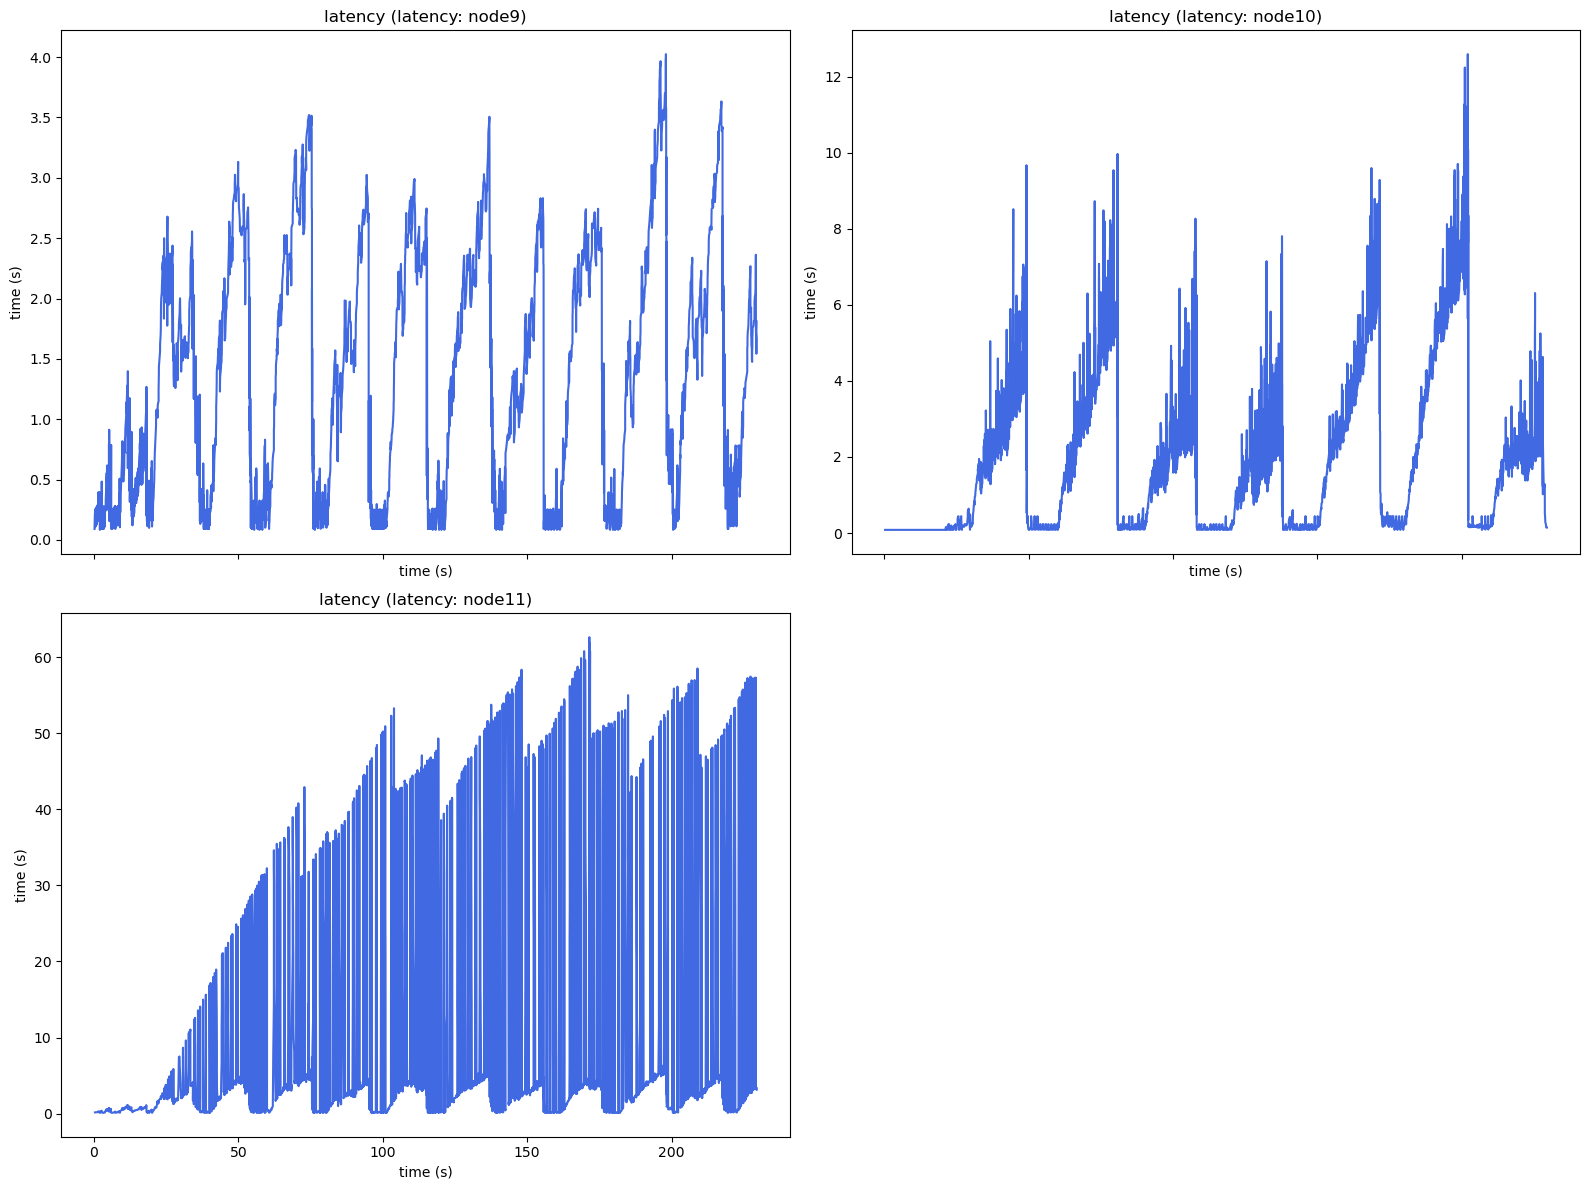

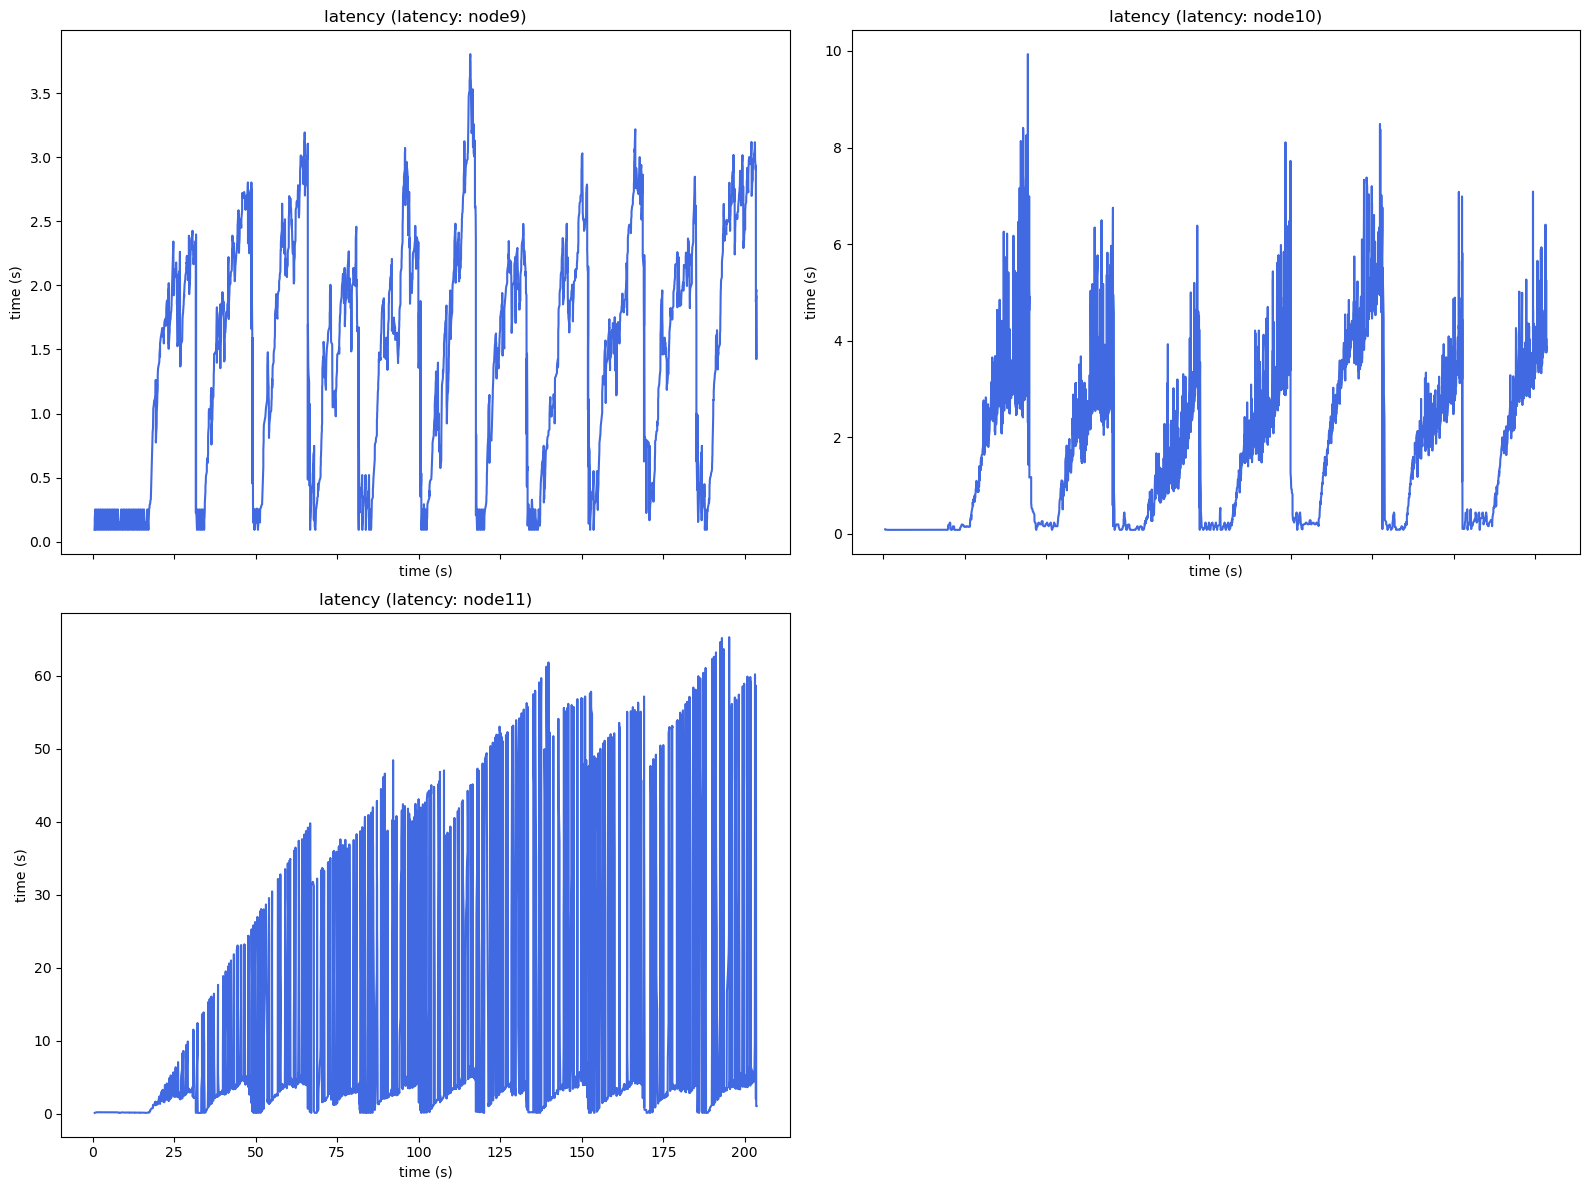

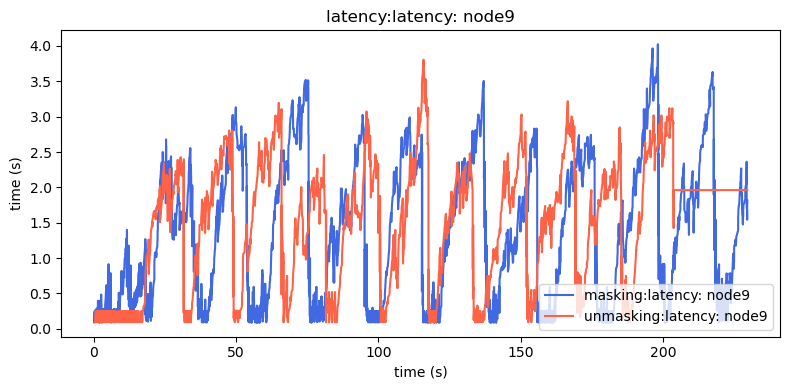

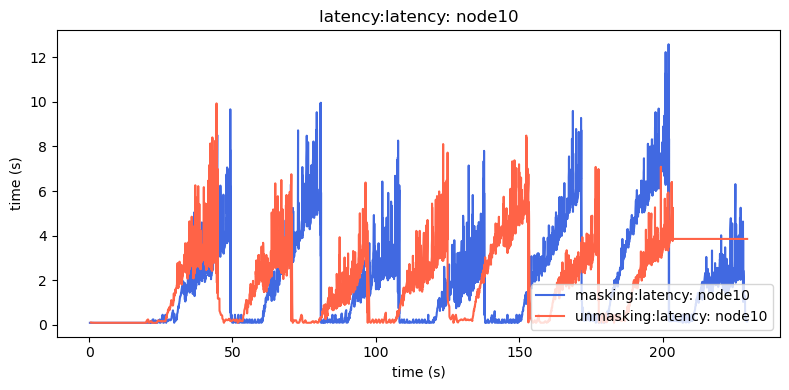

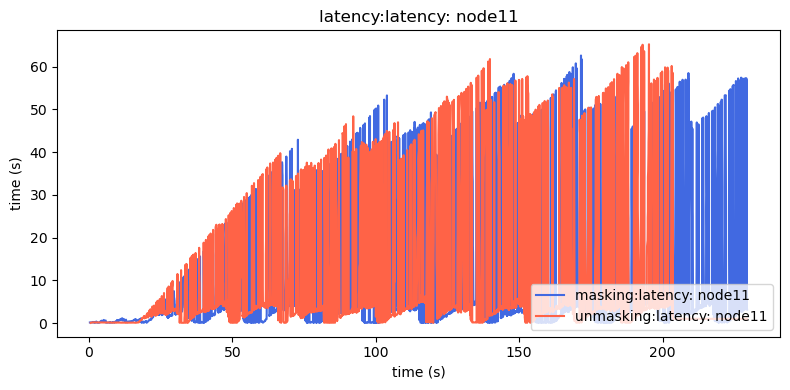

In [14]:
lrlo.plot_each_latency(latency_masking_df)
lrlo.plot_each_latency(latency_unmasking_df)
lrlo.plot_each_comparison_latency([latency_masking_df, latency_unmasking_df], ["masking", "unmasking"])

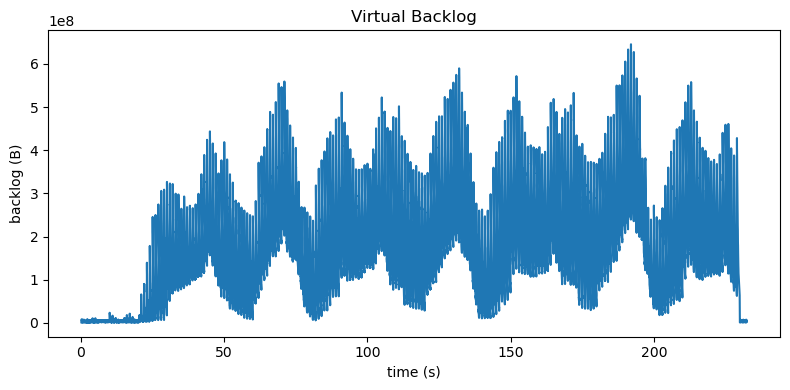

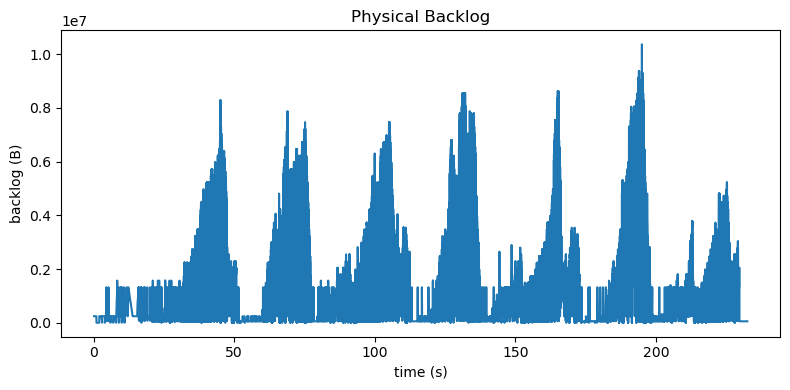

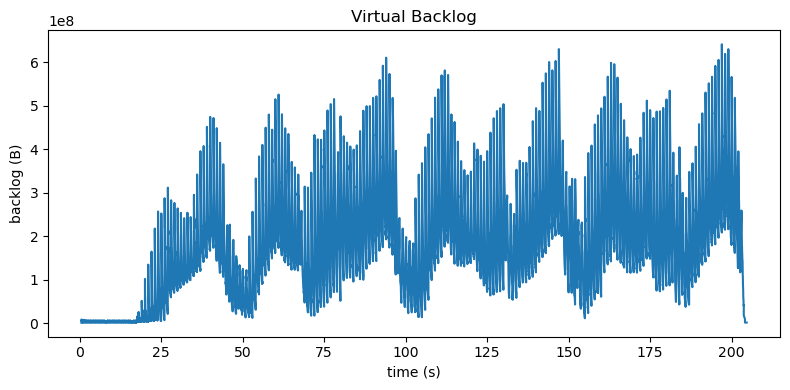

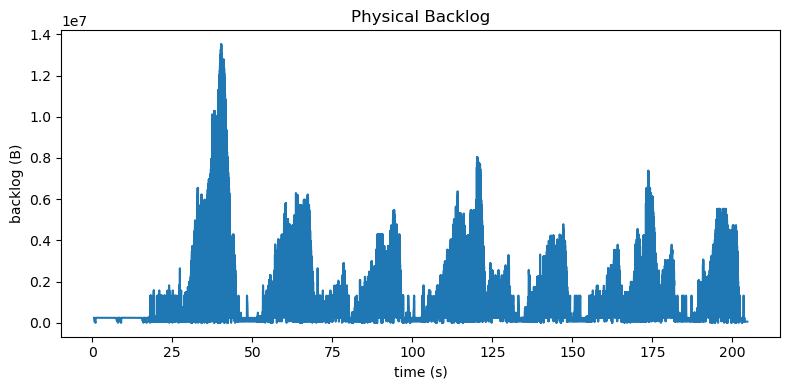

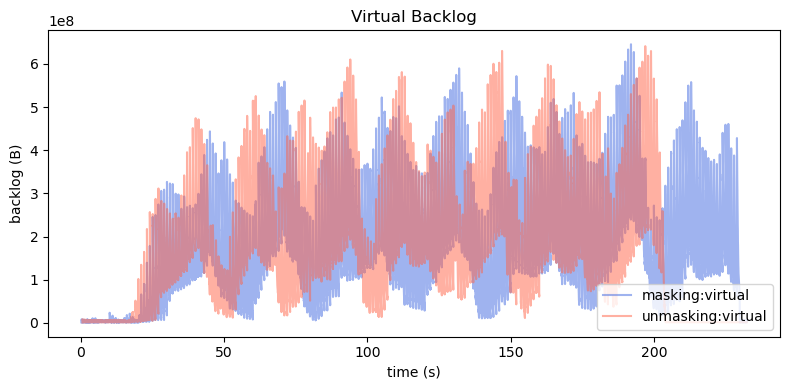

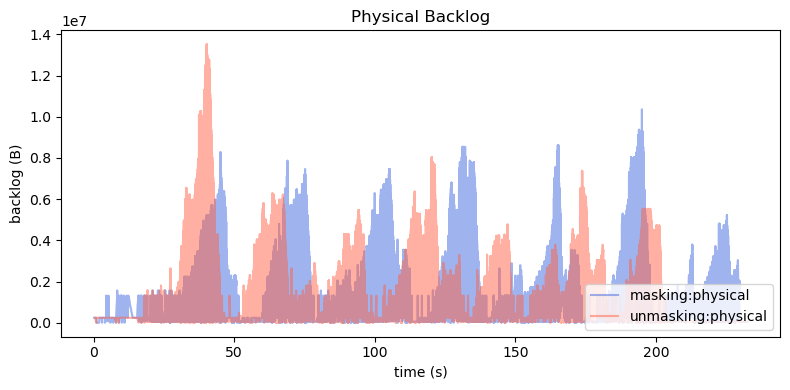

In [15]:
lrlo.plot_backlog(sum_masking_df)
lrlo.plot_backlog(sum_unmasking_df)

lrlo.plot_comparison_backlog([sum_masking_df, sum_unmasking_df], ["masking", "unmasking"])

In [16]:
dm.df_info(sum_unmasking_df, 100)

DataFrame Info:
✲ Shape: (99430, 2)
✲ Columns:
Index(['virtual backlog', 'physical backlog'], dtype='object')

✲ Data Types:
virtual backlog     float64
physical backlog    float64
dtype: object

✲Non-null Value Counts:
virtual backlog     99430
physical backlog    99430
dtype: int64

DataFrame HEAD:
--------------------------------------------------


virtual backlog  physical backlog
vectime                                    
0.466669              0.0               0.0
0.466673              0.0               0.0
0.466673              0.0               0.0
0.466677              0.0               0.0
0.466681              0.0               0.0
...                   ...               ...
1.069546              0.0               0.0
1.069614              0.0               0.0
1.069682              0.0               0.0
1.069830              0.0               0.0
1.078710              0.0          248800.0

[100 rows x 2 columns]

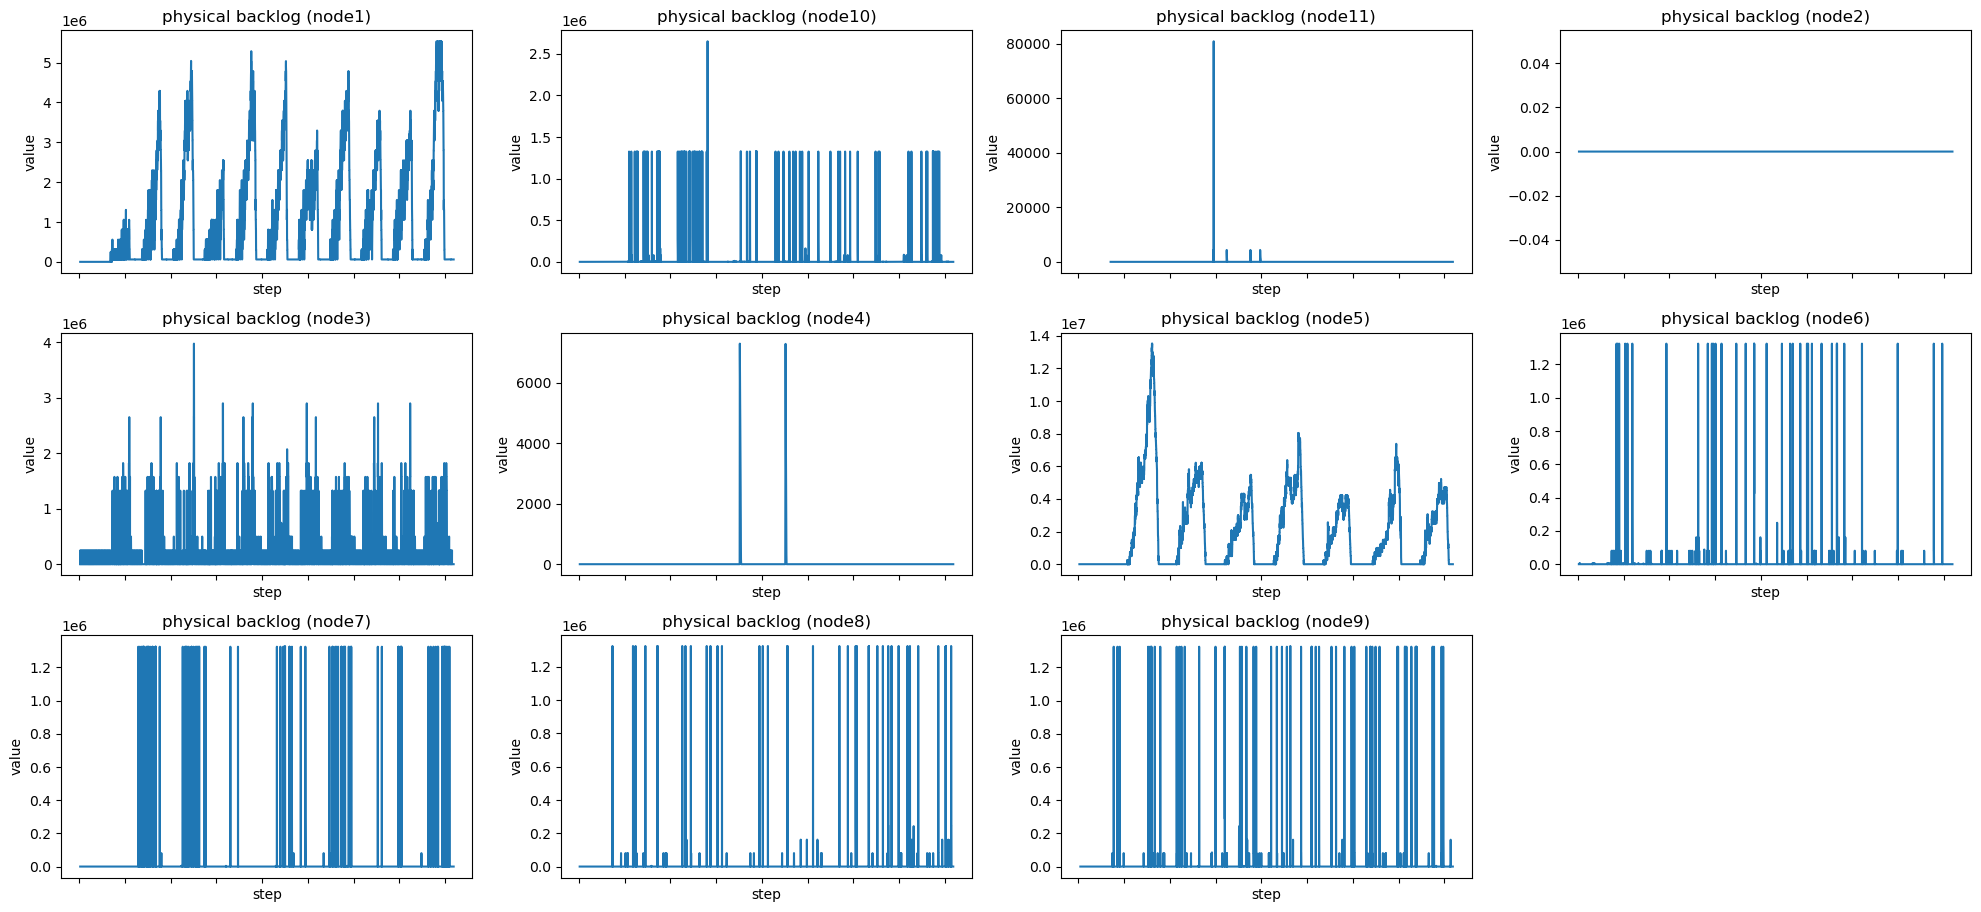

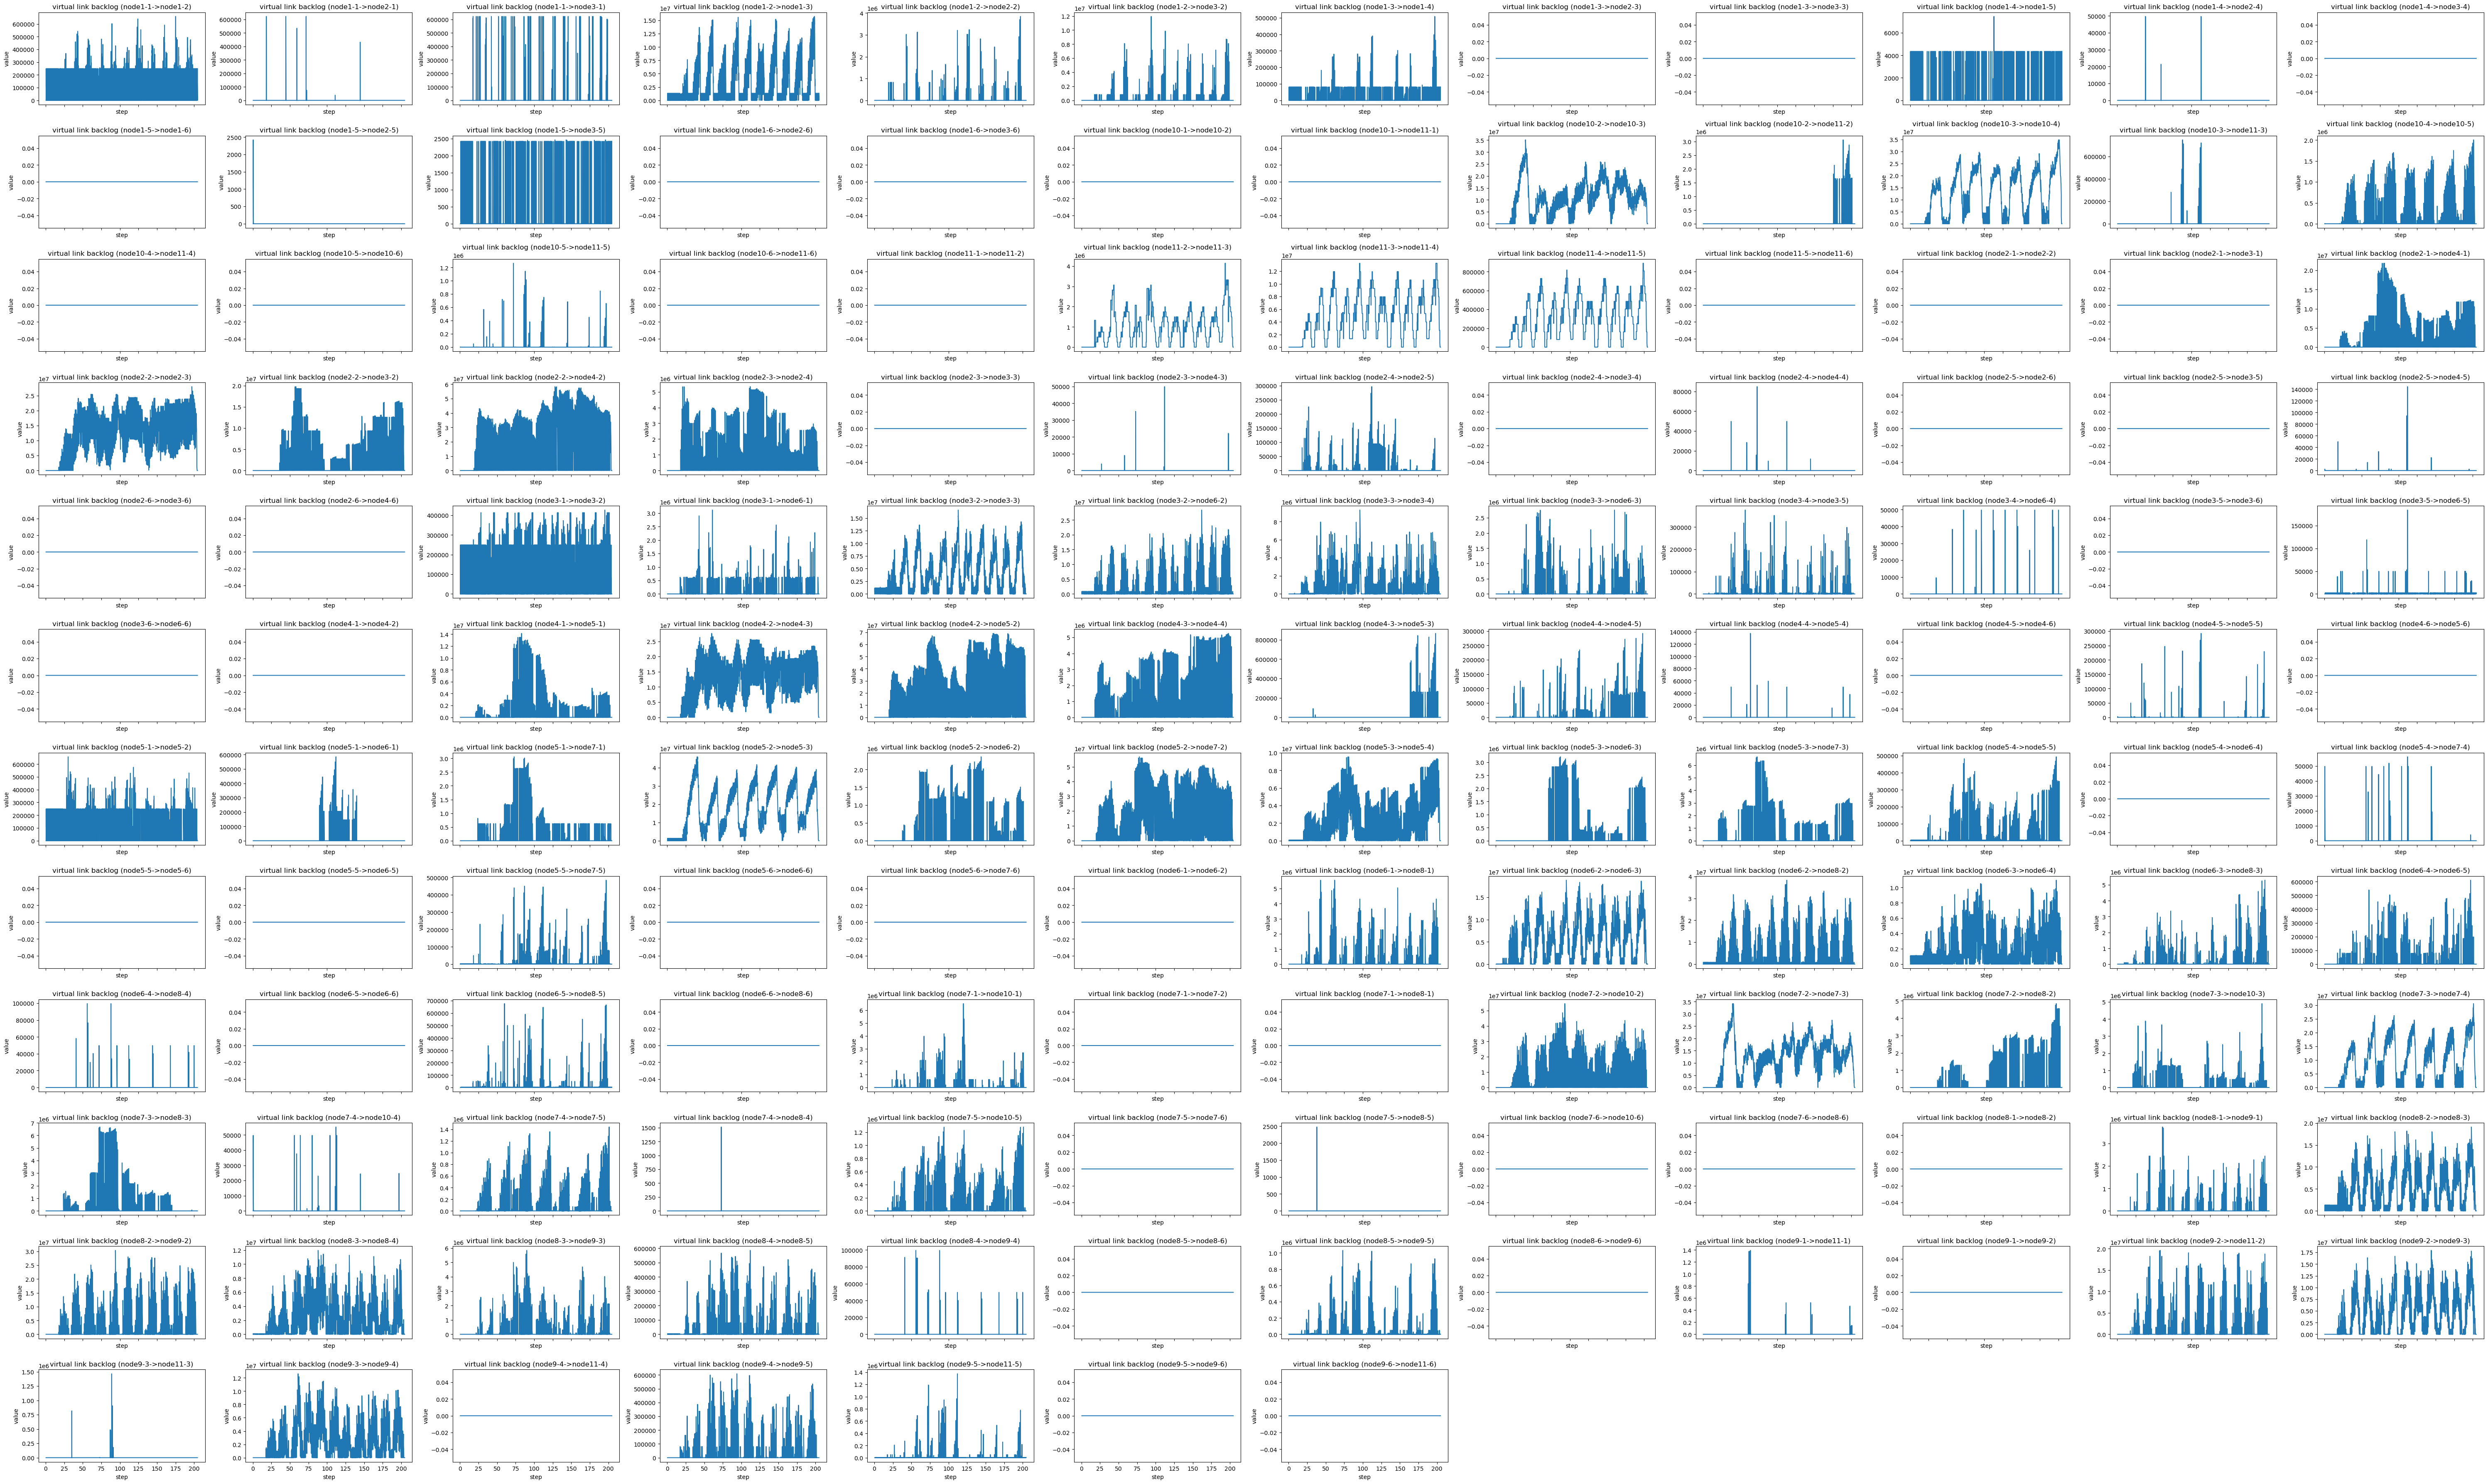

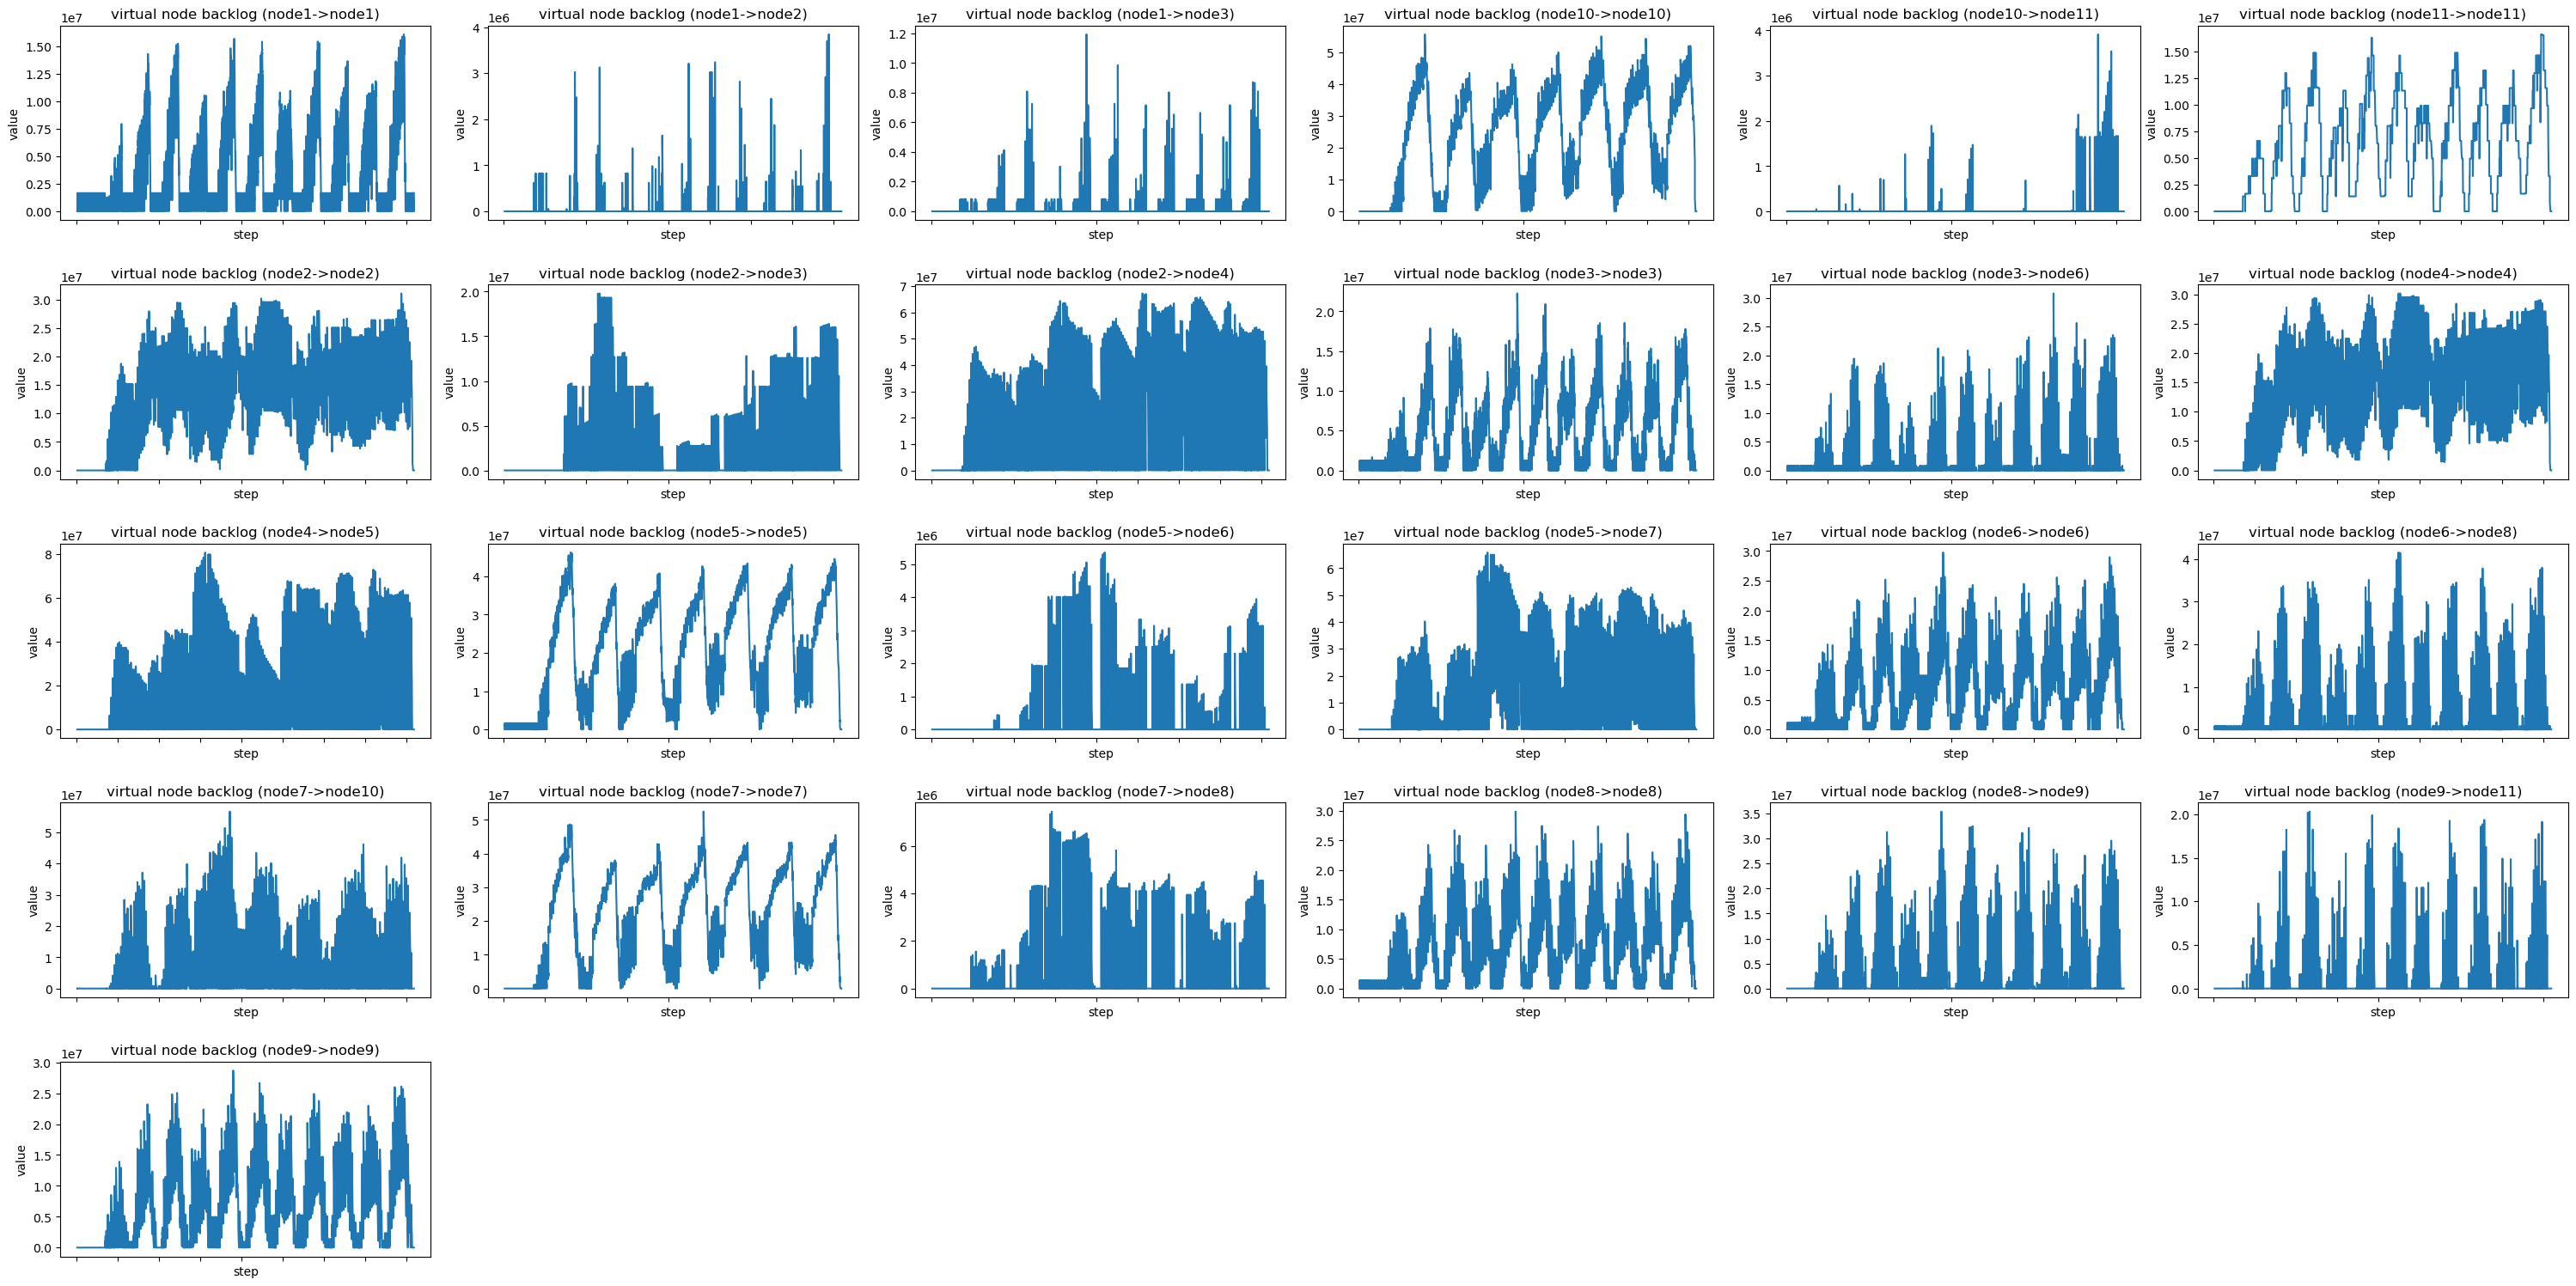

In [17]:
lrlo.plot_each_backlog(backlog_unmasking_df)

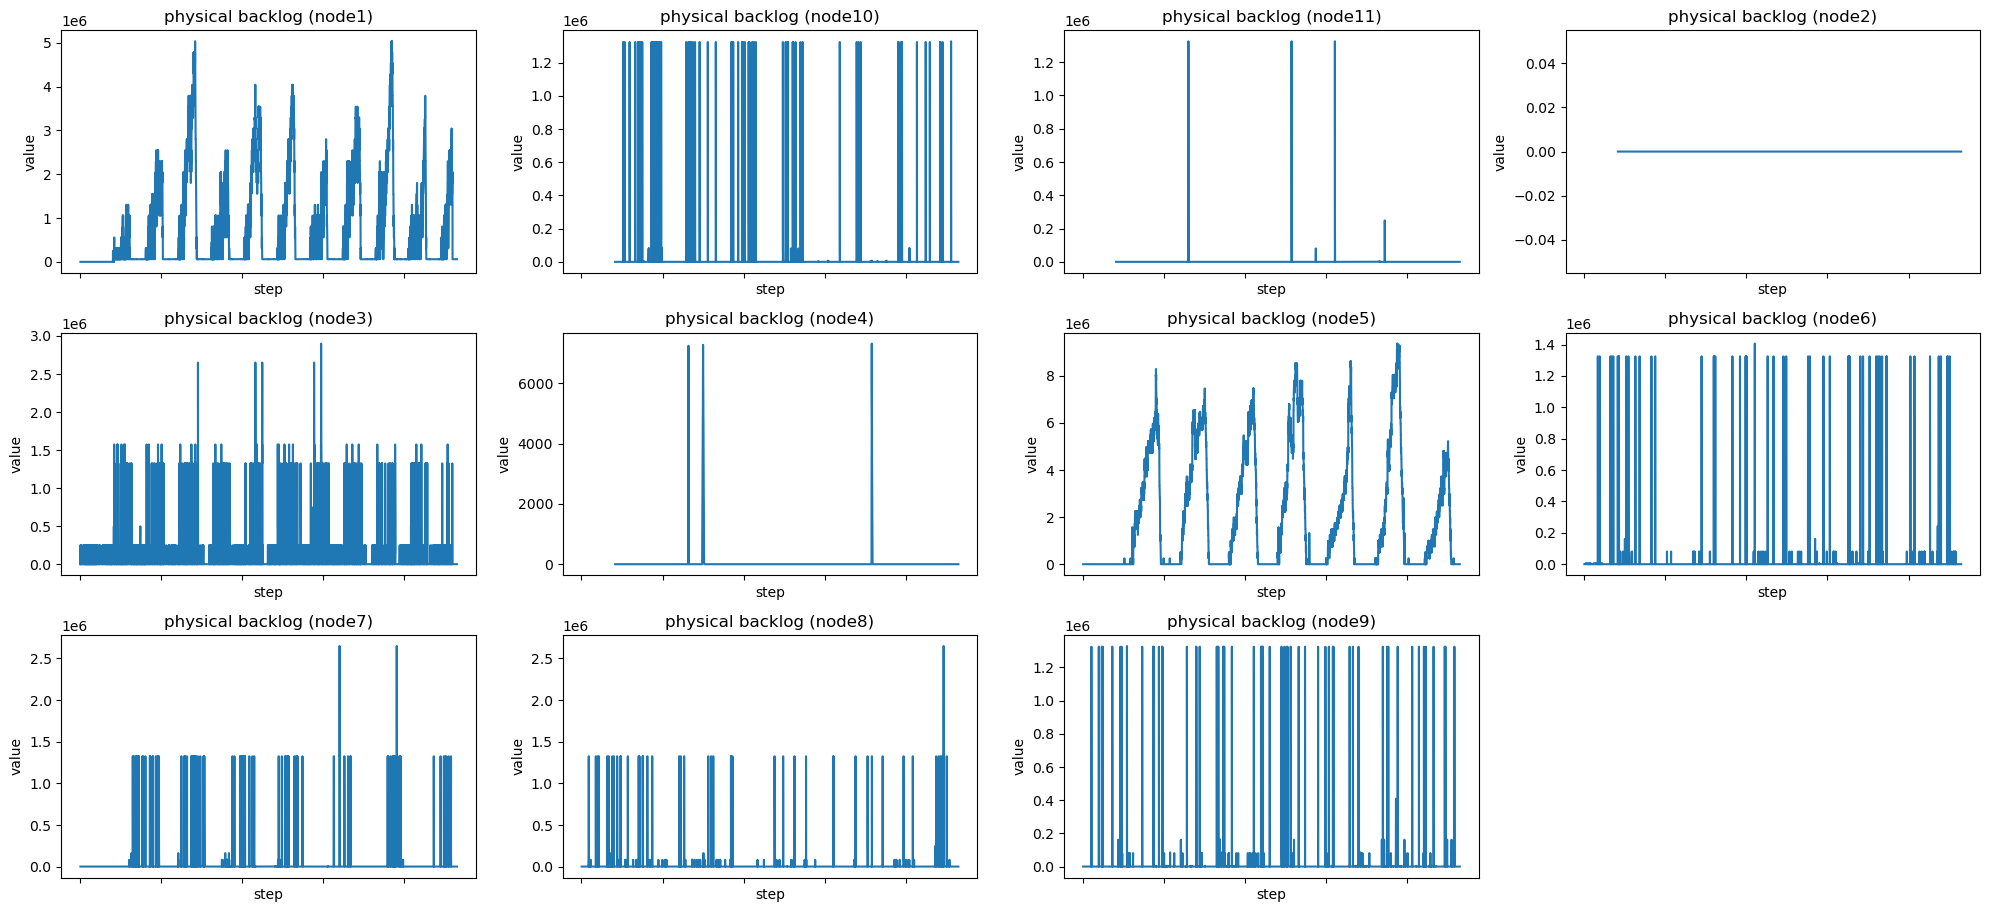

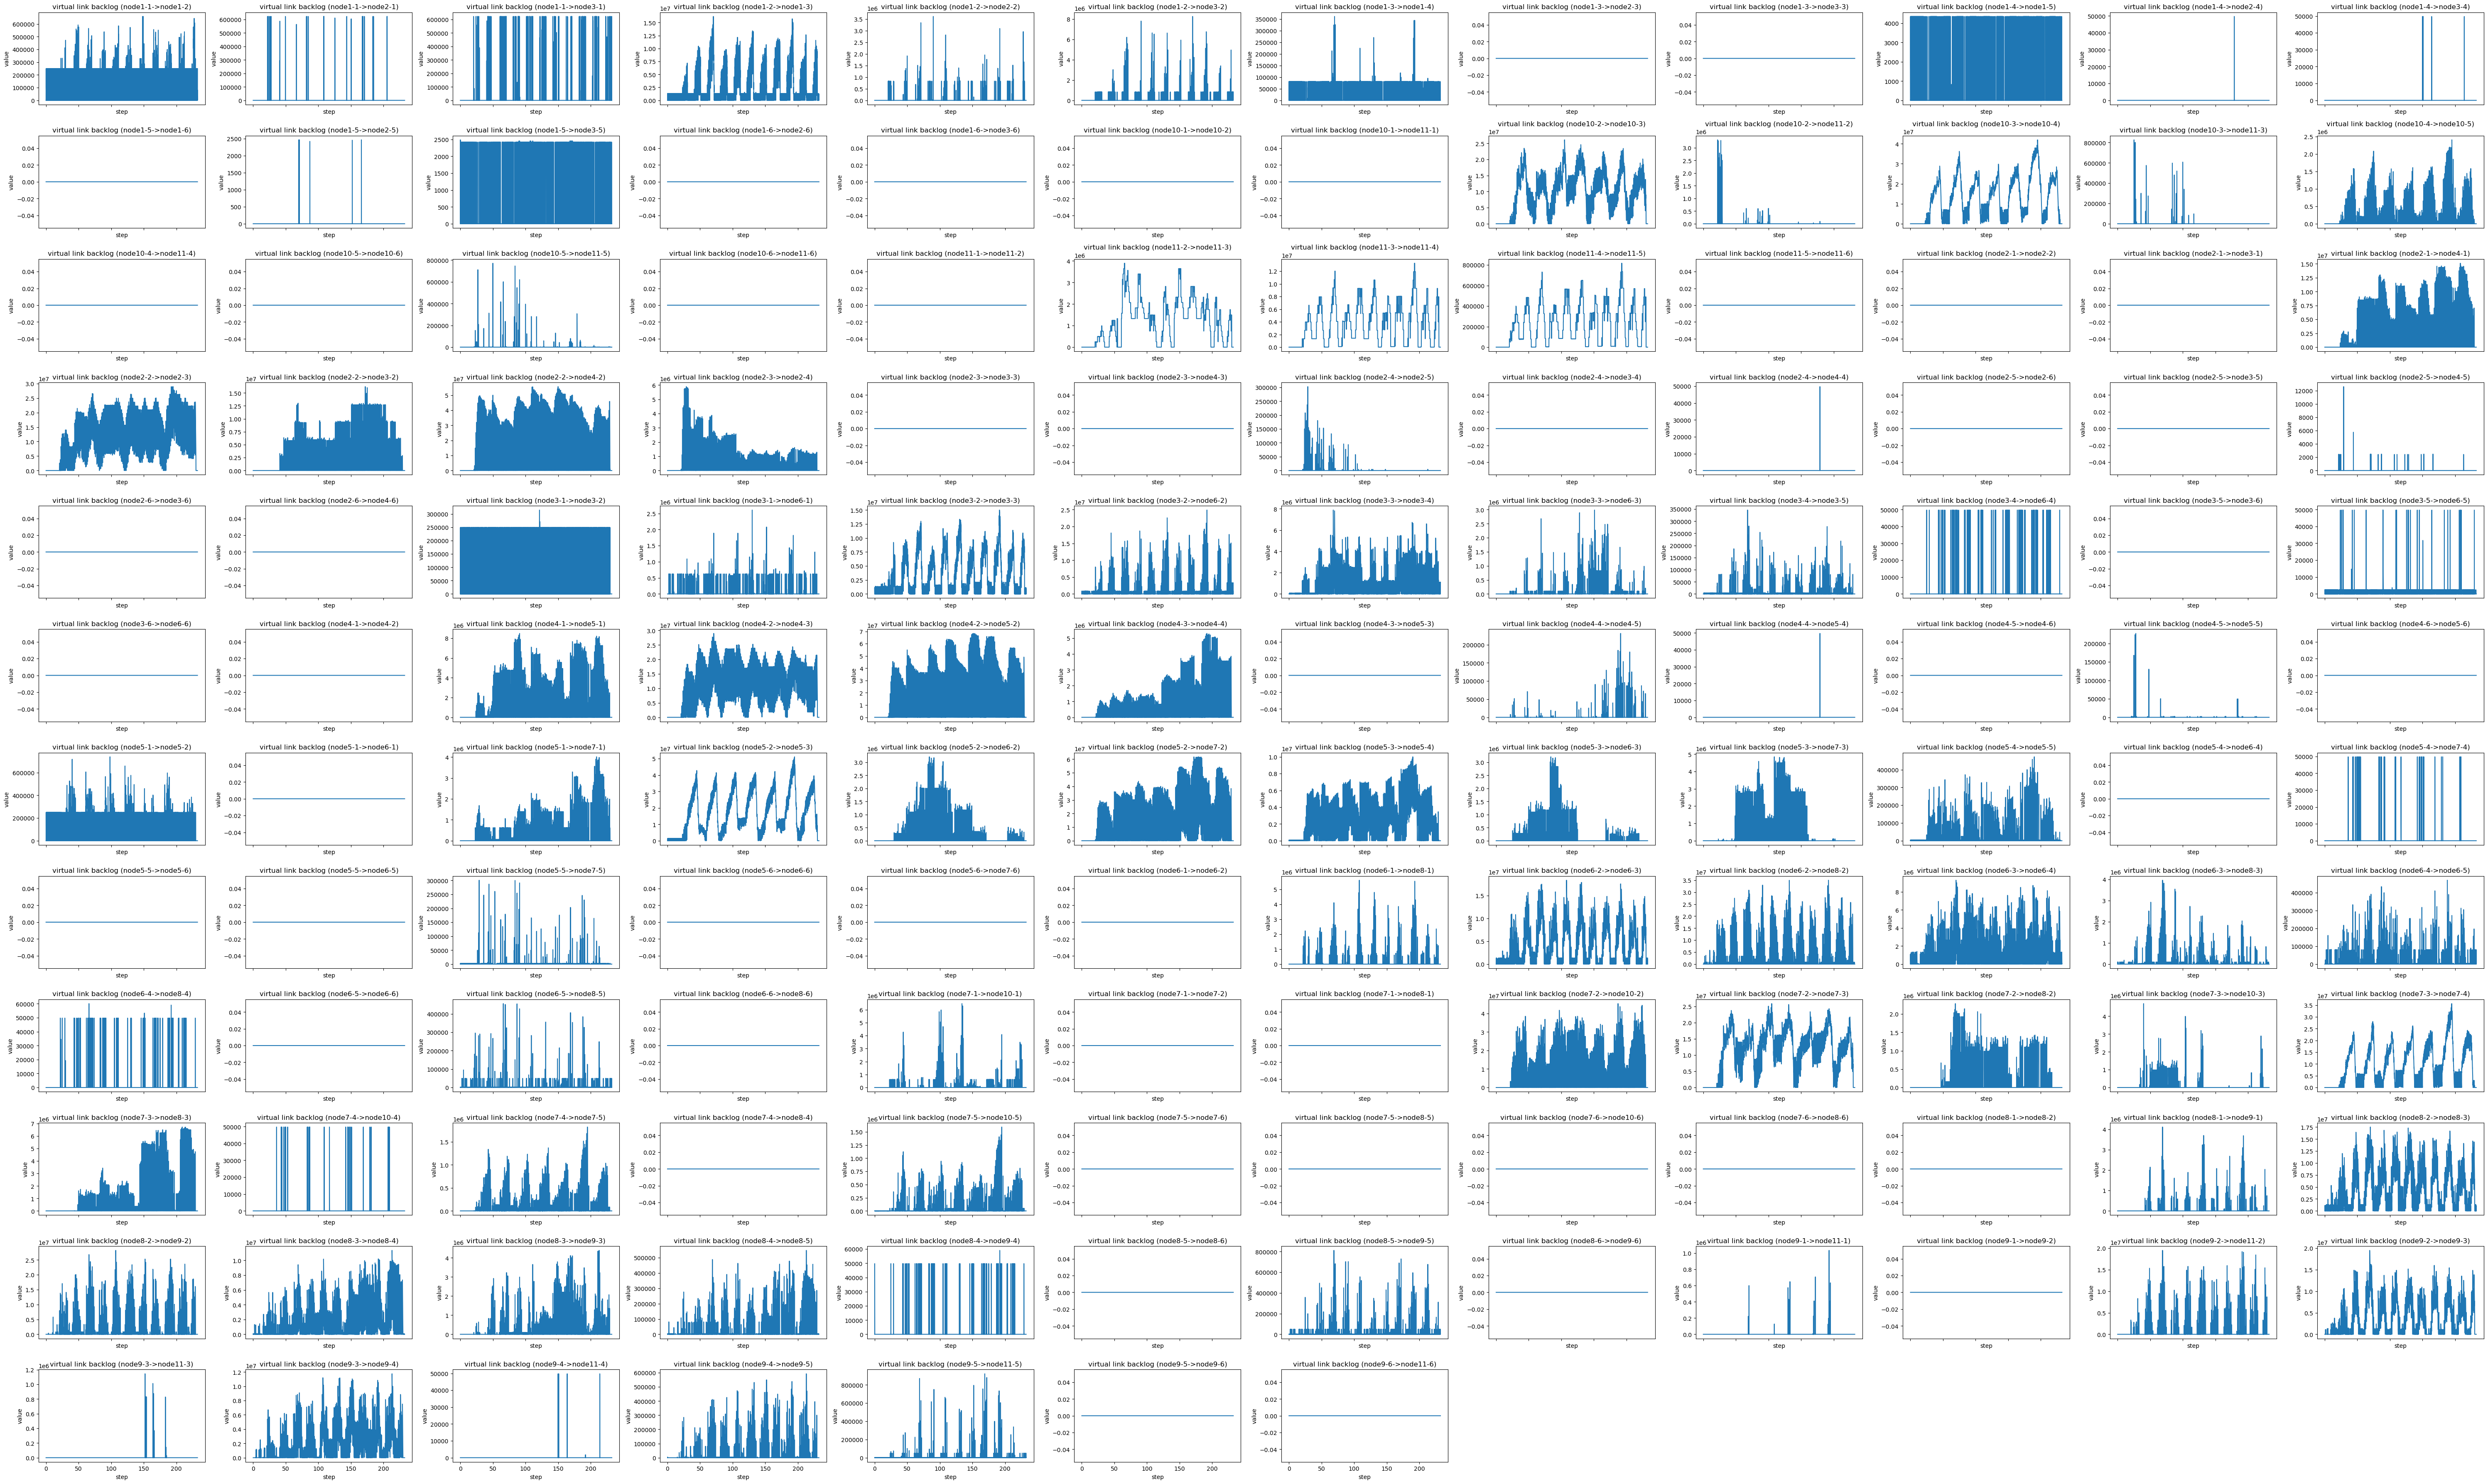

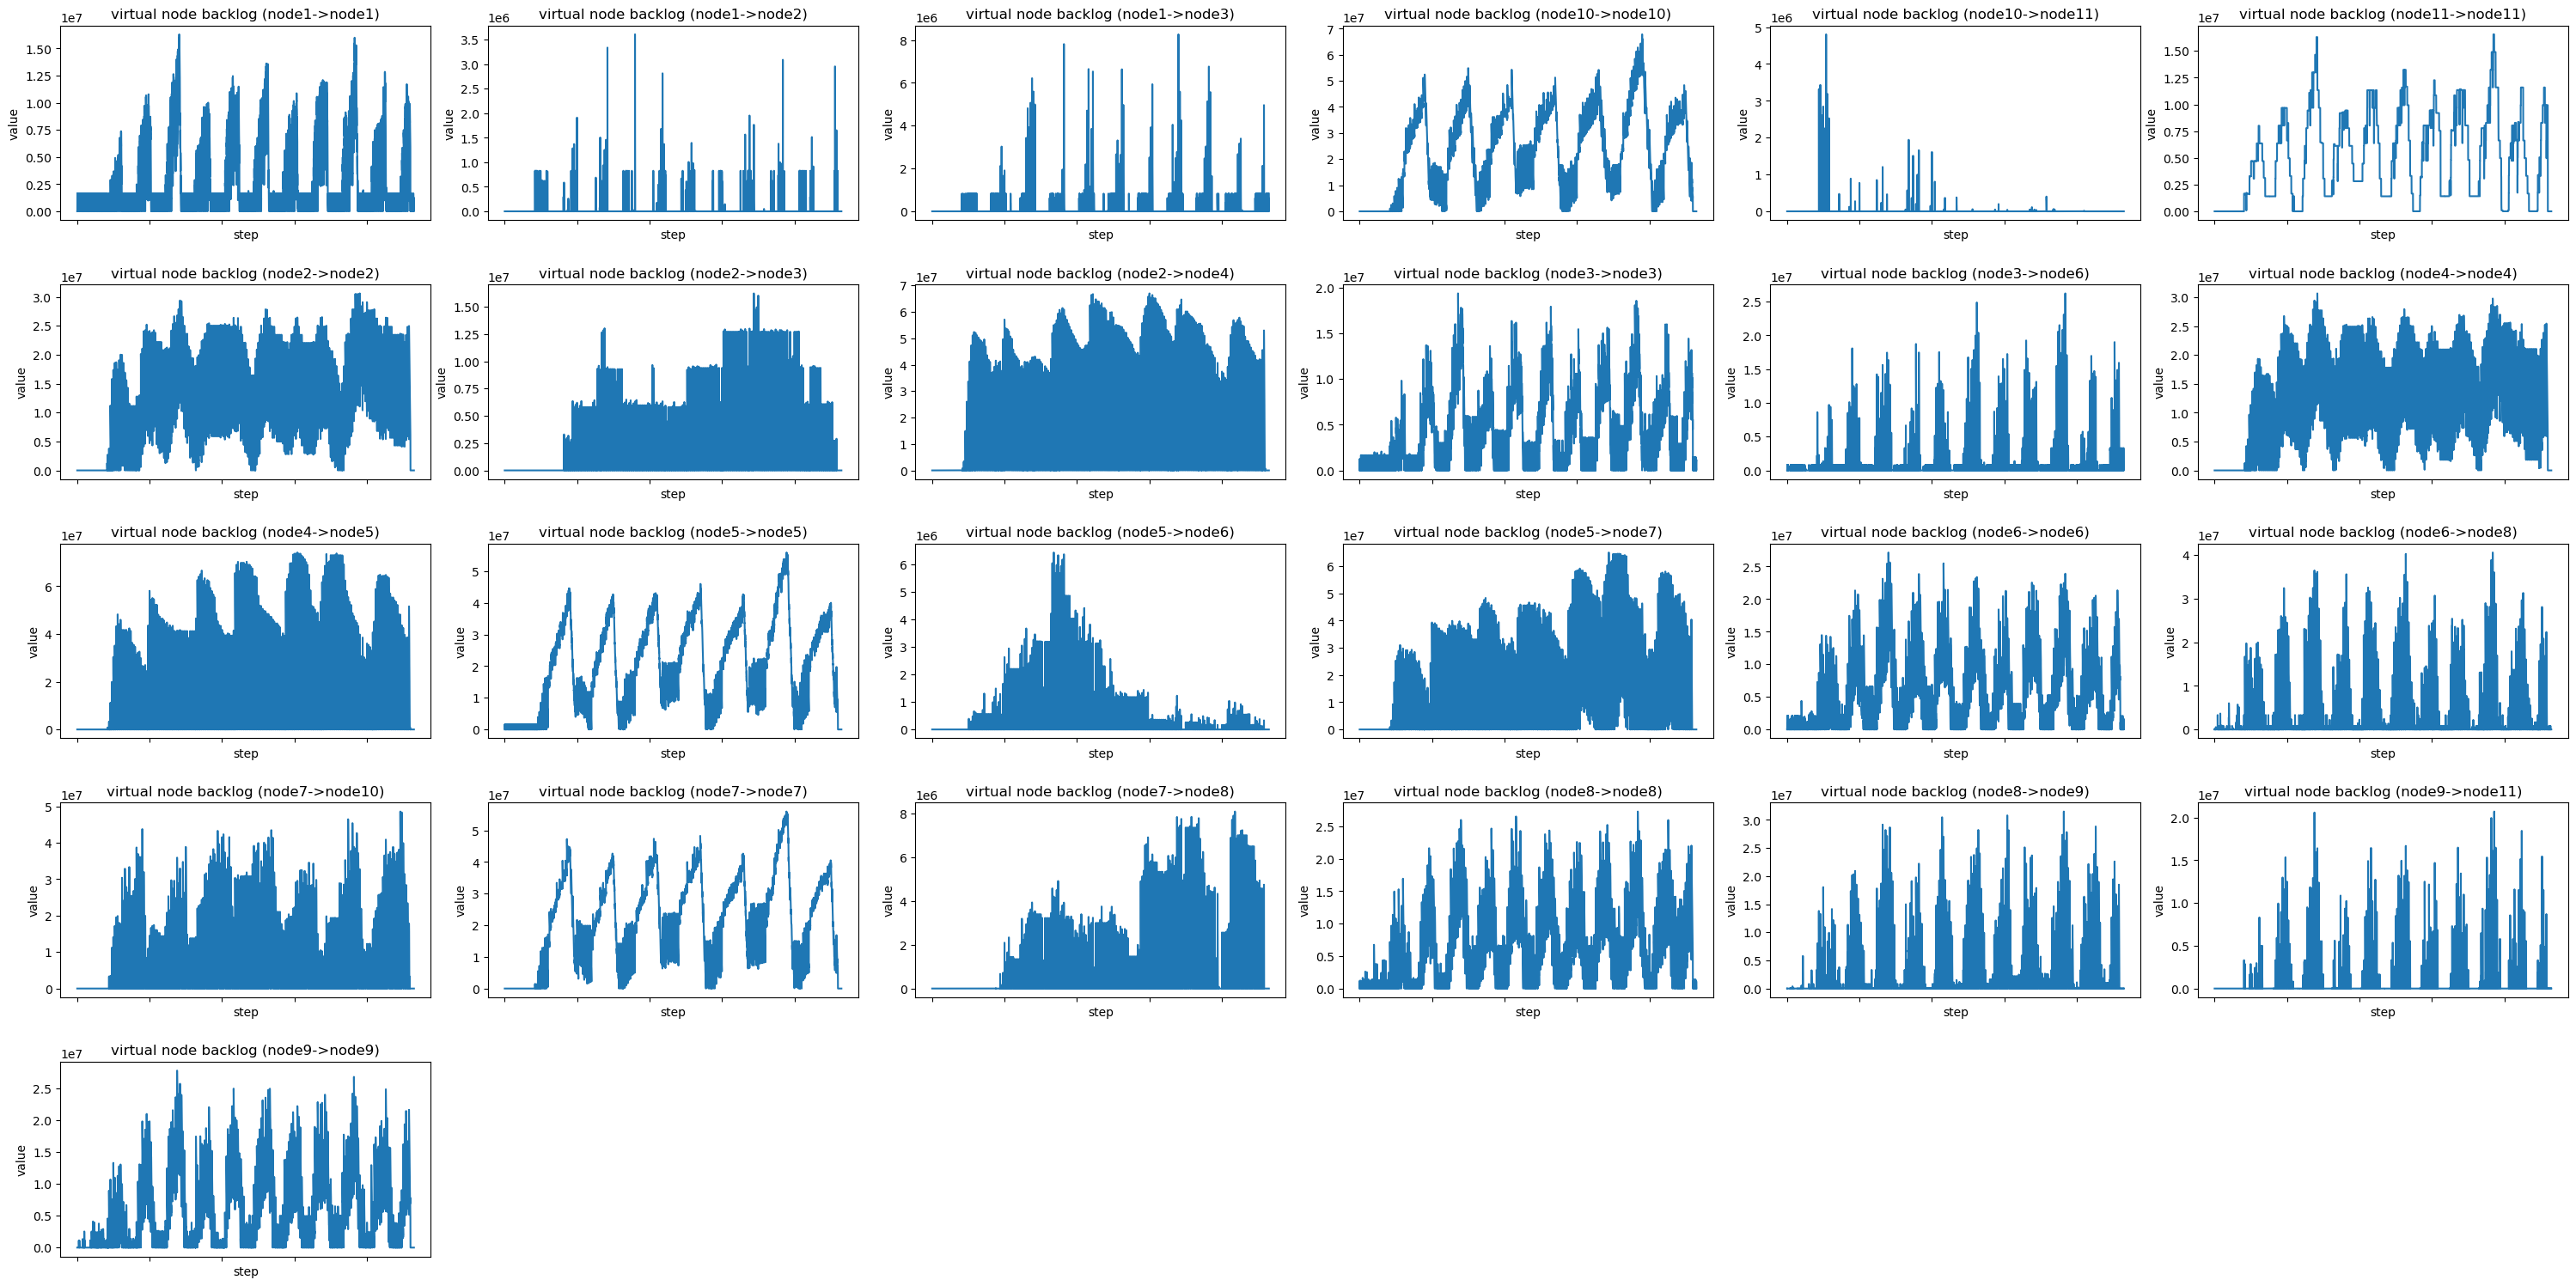

In [18]:
lrlo.plot_each_backlog(backlog_masking_df)